In [ ]:
%load_ext autoreload
import datetime
# import ete3
import itertools
# import json
import logging
import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import pm4py
import typing
# import re
import xml.etree.ElementTree as ET
# import xml.dom.minidom
# import xmlschema

In [33]:
%autoreload
from maxes.xes_loader2 import XesLoader, XesLog
# from maxes.xes_file import XesFile
# from maxes.analyze_xes import AnalyzeXes
# import maxes.analyze_sequence
# import maxes.serialization.serialize
# import maxes.graphs
import maxes.notebooks.utils
import maxes.utils

In [3]:
maxes.notebooks.utils.init_notebook() # RUN ONLY ONCE

Loading config from: C:\vt\md\maxes\maxes\config.local.yml
Config:
{'project_directory_path': '/vt/md/maxes/maxes', 'data_directory_path': '/vt/md/maxes/maxes/data'}


In [76]:
from maxes.notebooks.utils import get_data_path

# log_path = get_data_path("other/simple.xes")

log_path = get_data_path("Data underlying the paper_ An agent-based process mining architecture for emergent behavior analysis_2_all\\FilteredFiles\\FilteredFiles\\411.xes")
log = XesLoader().load(log_path)
len(log.traces)

1296

In [77]:
log.traces[0].df

,ID,concept:instance,org:resource,lifecycle:transition,concept:name,time:timestamp
0,1,Console,.Models.JobShop.Source,Start,Arrival,2019-04-17 22:00:00+00:00
1,2,Console,.Models.JobShop.Source,Complete,Arrival,2019-04-17 22:00:00+00:00
2,3,Console,.Models.JobShop.Buffer,Start,Transport,2019-04-17 22:00:00+00:00
3,4,Console,.Models.JobShop.Buffer,Waiting,Transport,2019-04-17 22:00:00+00:00
4,10,Console,.MUs.AGV:4,In progress,Transport,2019-04-17 22:00:54+00:00
5,15,Console,.MUs.AGV:4,Complete,Transport,2019-04-17 22:01:44+00:00
6,16,Console,.Models.JobShop.Welding.Input,Start,Welding,2019-04-17 22:01:44+00:00
7,17,Console,.Models.JobShop.Welding.Input,Waiting,Welding,2019-04-17 22:01:44+00:00
8,33,Console,.Models.JobShop.Welding.Machine,In progress,Welding,2019-04-17 22:02:57.159000+00:00
9,49,Console,.Models.JobShop.Welding.Machine,Complete,Welding,2019-04-17 22:04:05.096000+00:00


In [78]:
from maxes.generators.xes_generator.xes_generator1 import XesGenerator1

generator = XesGenerator1(traces_count=10).fit(log)

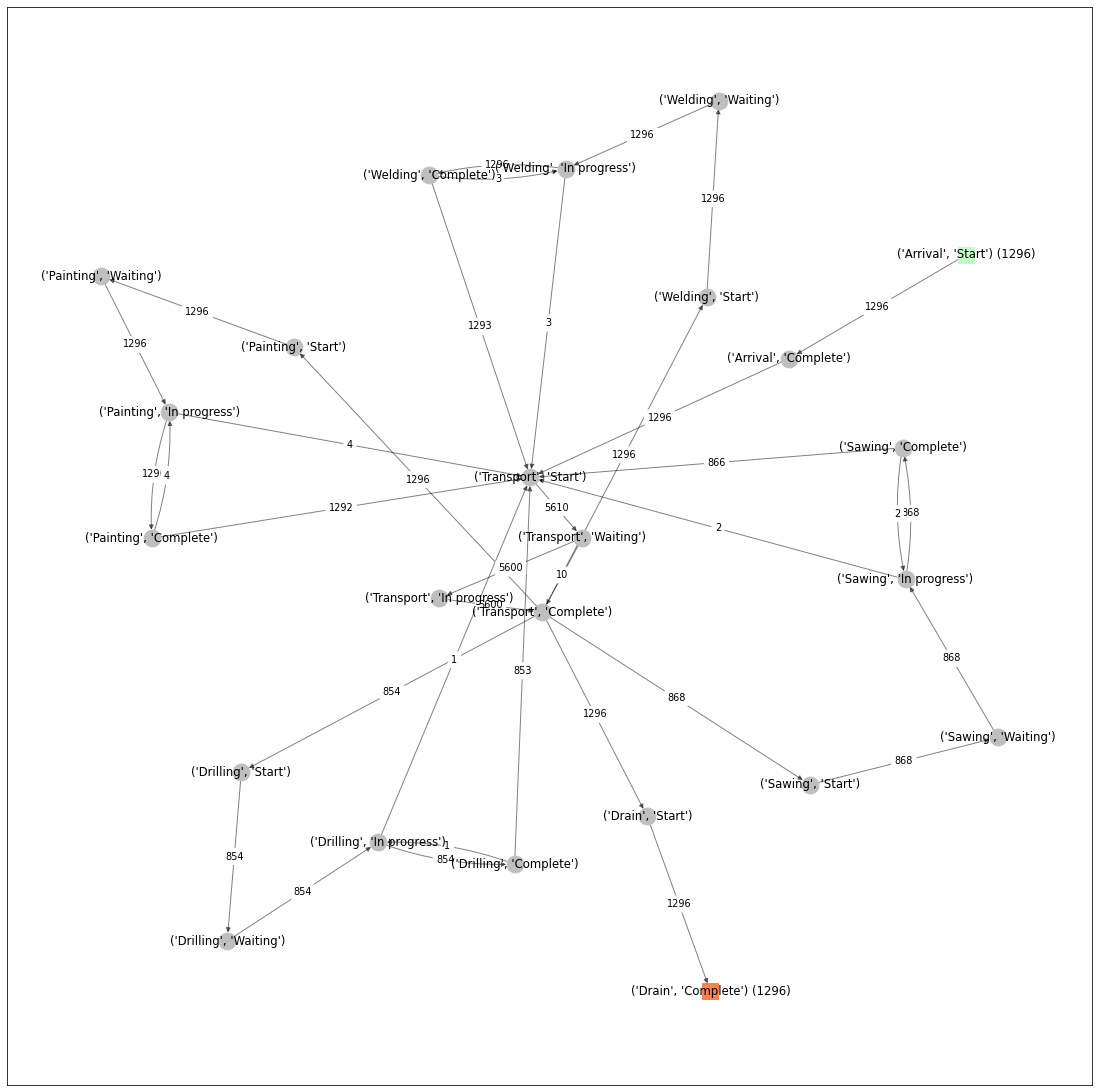

In [79]:
from maxes.analyze_sequence import draw_nx_graph

graph = generator.sequence_graph_

fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
fig.dpi = 70
draw_nx_graph(graph, ax=ax, pos=nx.kamada_kawai_layout(graph), edge_label="frequency")

In [80]:
generator.traces_count = 1
generated_log = generator.generate()
generated_log.traces[0].df

,concept:name,lifecycle:transition,time:timestamp,ID,concept:instance,org:resource
0,Arrival,Start,2019-04-18 11:49:47.352735+00:00,3958,Robot,.Models.JobShop.Welding.Input
1,Arrival,Complete,2019-04-18 11:49:47.352735+00:00,32463,Robot,.Models.JobShop.Sawing.Input
2,Transport,Start,2019-04-18 11:49:48.994161+00:00,10261,Robot,.Models.JobShop.Buffer
3,Transport,Waiting,2019-04-18 11:49:48.994161+00:00,8184,Helicopter,.Models.JobShop.Sawing.Input
4,Transport,In progress,2019-04-18 12:00:31.533632+00:00,39962,Robot,.Models.JobShop.Welding.Output
5,Transport,Complete,2019-04-18 12:01:17.805104+00:00,20462,Console,.Models.JobShop.Sawing.Output
6,Welding,Start,2019-04-18 12:01:19.332136+00:00,22523,Robot,.Models.JobShop.Drilling.Input
7,Welding,Waiting,2019-04-18 12:01:19.433499+00:00,37808,Robot,.Models.JobShop.Buffer
8,Welding,In progress,2019-04-18 12:08:09.893903+00:00,40290,Helicopter,.MUs.AGV:4
9,Welding,Complete,2019-04-18 12:09:16.887940+00:00,24351,Helicopter,.MUs.AGV:4


In [81]:
pm4py_log = pm4py.read_xes(log_path)
pm4py_log

parsing log, completed traces ::   0%|          | 0/1296 [00:00<?, ?it/s]

,ID,concept:instance,org:resource,lifecycle:transition,concept:name,time:timestamp,case:concept:name
0,1,Console,.Models.JobShop.Source,Start,Arrival,2019-04-18 00:00:00+00:00,.MUs.Console:1
1,2,Console,.Models.JobShop.Source,Complete,Arrival,2019-04-18 00:00:00+00:00,.MUs.Console:1
2,3,Console,.Models.JobShop.Buffer,Start,Transport,2019-04-18 00:00:00+00:00,.MUs.Console:1
3,4,Console,.Models.JobShop.Buffer,Waiting,Transport,2019-04-18 00:00:00+00:00,.MUs.Console:1
4,10,Console,.MUs.AGV:4,In progress,Transport,2019-04-18 00:00:54+00:00,.MUs.Console:1
...,...,...,...,...,...,...,...
44875,10933,Robot,.Models.JobShop.Painting.Output,Waiting,Transport,2019-04-18 05:34:50.352000+00:00,.MUs.Robot:99
44876,11178,Robot,.MUs.AGV:1,In progress,Transport,2019-04-18 05:41:39.385000+00:00,.MUs.Robot:99
44877,11203,Robot,.MUs.AGV:1,Complete,Transport,2019-04-18 05:42:29.385000+00:00,.MUs.Robot:99
44878,11204,Robot,.Models.JobShop.Drain,Start,Drain,2019-04-18 05:42:29.385000+00:00,.MUs.Robot:99


In [82]:
net, im, fm = pm4py.discover_petri_net_inductive(pm4py_log)
net, im, fm

(places: [ p_10, p_11, p_12, p_13, p_15, p_16, p_17, p_19, p_20, p_22, p_23, p_25, p_26, p_28, p_29, p_6, p_7, sink, source ]
 transitions: [ (01aa51f6-5cca-4acd-a2d7-5b6ad39ea9de, 'Drain'), (0a1f2b36-ea95-4848-a486-4c248aaec781, 'Welding'), (2ab01f0f-a71e-44f6-b5cf-149777ee3b2d, 'Drilling'), (4c267fa3-6328-47d5-b8fe-85fa3e95ba42, 'Transport'), (60543e64-d4bc-42f1-95c8-36984562c8a3, 'Sawing'), (7177e302-60ee-41e5-b51d-23ca2090a046, 'Painting'), (b52fd636-31c7-41b6-a414-91dfc0930415, 'Arrival'), (init_loop_13, None), (init_loop_17, None), (init_loop_21, None), (init_loop_25, None), (init_loop_9, None), (loop_8, None), (skip_11, None), (skip_12, None), (skip_15, None), (skip_16, None), (skip_19, None), (skip_20, None), (skip_23, None), (skip_24, None), (skip_27, None), (skip_28, None), (skip_29, None), (skip_32, None), (skip_33, None), (skip_5, None), (skip_6, None), (tau_1, None) ]
 arcs: [ (01aa51f6-5cca-4acd-a2d7-5b6ad39ea9de, 'Drain')->p_29, (0a1f2b36-ea95-4848-a486-4c248aaec781, 'We

In [83]:
generated_log.update_df()
generated_log.df["case:concept:name"] = ".MUs.Console:1"
generated_log.df

,concept:name,lifecycle:transition,time:timestamp,ID,concept:instance,org:resource,case:concept:name
0,Arrival,Start,2019-04-18 11:49:47.352735+00:00,3958,Robot,.Models.JobShop.Welding.Input,.MUs.Console:1
1,Arrival,Complete,2019-04-18 11:49:47.352735+00:00,32463,Robot,.Models.JobShop.Sawing.Input,.MUs.Console:1
2,Transport,Start,2019-04-18 11:49:48.994161+00:00,10261,Robot,.Models.JobShop.Buffer,.MUs.Console:1
3,Transport,Waiting,2019-04-18 11:49:48.994161+00:00,8184,Helicopter,.Models.JobShop.Sawing.Input,.MUs.Console:1
4,Transport,In progress,2019-04-18 12:00:31.533632+00:00,39962,Robot,.Models.JobShop.Welding.Output,.MUs.Console:1
5,Transport,Complete,2019-04-18 12:01:17.805104+00:00,20462,Console,.Models.JobShop.Sawing.Output,.MUs.Console:1
6,Welding,Start,2019-04-18 12:01:19.332136+00:00,22523,Robot,.Models.JobShop.Drilling.Input,.MUs.Console:1
7,Welding,Waiting,2019-04-18 12:01:19.433499+00:00,37808,Robot,.Models.JobShop.Buffer,.MUs.Console:1
8,Welding,In progress,2019-04-18 12:08:09.893903+00:00,40290,Helicopter,.MUs.AGV:4,.MUs.Console:1
9,Welding,Complete,2019-04-18 12:09:16.887940+00:00,24351,Helicopter,.MUs.AGV:4,.MUs.Console:1


In [85]:
pm4py.conformance.precision_alignments(generated_log.df, net, im, fm)

computing precision with alignments, completed variants ::   0%|          | 0/39 [00:00<?, ?it/s]

0.25316455696202533